# HOTELS - Analyse des sentiments - Illustration sur Davys' Crockett

**(1) Préparation du répertoire et des principaux packages**

In [5]:
import os
os.chdir("C:/projet")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

**(2) Analyse rapide du fichier**

**8860 avis** entre septembre 2016 et décembre 2022. 392 avis pour 2022 (au 20/12), soit **32 avis en moyenne / mois**. 

In [7]:
import pandas as pd
reviews=pd.read_csv("hotel_davy_crockett_clean.csv", sep=",")
reviews.info( ) #7645 avis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre_commentaire  7645 non-null   object 
 1   commentaire        7645 non-null   object 
 2   Mois_Avis          7645 non-null   object 
 3   Annee_Avis         7645 non-null   int64  
 4   Ville              7645 non-null   object 
 5   Pays               7644 non-null   object 
 6   Mois_Sejour        7645 non-null   object 
 7   Annee_Sejour       7569 non-null   float64
 8   Note               7645 non-null   int64  
 9   Photo              7645 non-null   object 
 10  langue             7645 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 657.1+ KB


In [8]:
#Le fichier comprend des avis datés entre septembre 2012 et décembre 2022
reviews['Annee_Avis'].tail(1)

7644    2004
Name: Annee_Avis, dtype: int64

In [5]:
reviews['Date_Avis'].head(1)

0    déc 2022
Name: Date_Avis, dtype: object

In [6]:
#on recherche la ligne du premier avis de 2022
reviews[reviews.isin(['janvier 2022'])].stack().tail(1)

391  Date_Sejour    janvier 2022
dtype: object

In [9]:
#Nombre d'avis en 2022 : 2800 # eronné
reviews.Annee_Avis.value_counts()

2022    2800
2017    1383
2018     823
2016     687
2015     534
2019     403
2014     258
2013     186
2012     152
2011     101
2020     100
2009      56
2010      50
2021      49
2008      26
2007      20
2006       9
2005       6
2004       2
Name: Annee_Avis, dtype: int64

**(3) Profils-clients**

(1). Langue du commentaire : plus de la moitié de francophones, suivis assez loin par les anglophones.

<AxesSubplot:xlabel="Langue de l'avis", ylabel='Nombre de répondants'>

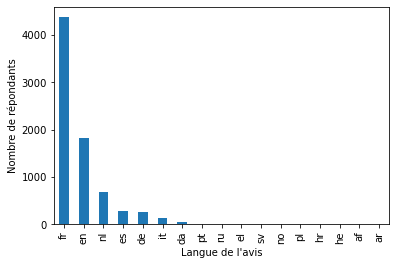

In [10]:
comptage=reviews['langue'].value_counts()
comptage.plot(kind='bar',stacked=True,ylabel="Nombre de répondants",xlabel="Langue de l'avis")

<AxesSubplot:ylabel='langue'>

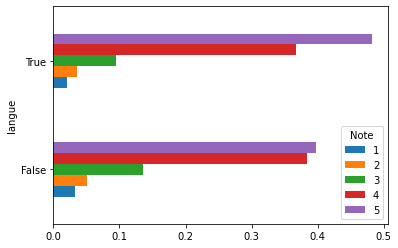

In [11]:
#Ventilation des Avis selon qu'ils sont francophones ou non
T=pd.crosstab(reviews['langue']=='fr',reviews['Note'], normalize='index')
T.plot.barh()

Note    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

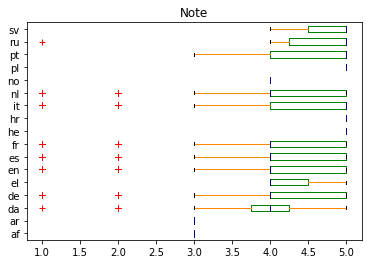

In [12]:
#Boîte de Turkey
color=dict(boxes='green',whiskers='DarkOrange',medians='DarkBlue',caps='Black')
reviews.plot.box(column='Note',by='langue',color=color,sym='r+',vert=False)

(3). Ventilation des notes.

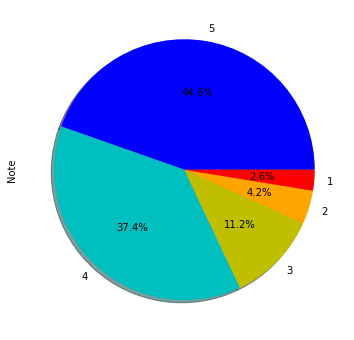

In [13]:
plt.figure(figsize=(6, 6))
cols = ['b','c','y','orange','r']
reviews['Note'].value_counts().plot.pie(autopct='%1.1f%%', shadow= True,colors=cols)
plt.show()

# I. Analyse des sentiments

In [14]:
only_reviews = reviews.iloc[:, 1].values

In [15]:
#Afin de réaliser l'analyse des sentiments, transformer les sous-listes en listes
import ast
liste=[ast.literal_eval(x) for x in only_reviews]

In [16]:
#Afin de réaliser l'analyse des sentiments, reformer les documents sous forme de chaîne 
documents =[" ".join(doc) for doc in liste]
print(documents[2])

bungalow premium très bien équipé clim chauffage électrique plus grand propre calme juste excellent piscine fermée dommage aimé profiter parking gratuit via logement


In [17]:
hotel_reviews = pd.DataFrame({'commentaires': documents})

In [18]:
hotel_reviews.head(3)

,commentaires
0,passé nuit sein hôtel très proche parc voiture...
1,tiens exprimer mécontentement concernant bunga...
2,bungalow premium très bien équipé clim chauffa...


In [19]:
print(type(hotel_reviews))

<class 'pandas.core.frame.DataFrame'>


In [20]:
# Initialisation de SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chrys\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Fonction lambda pour obtenir les scores composés.
function = lambda title: vader.polarity_scores(title)['compound']
hotel_reviews['compound'] = hotel_reviews['commentaires'].apply(function)

In [22]:
hotel_reviews.head(3)

,commentaires,compound
0,passé nuit sein hôtel très proche parc voiture...,0.0000
1,tiens exprimer mécontentement concernant bunga...,-0.6124
2,bungalow premium très bien équipé clim chauffa...,0.8126


In [21]:
#si wordcloud non installé
#pip install wordcloud

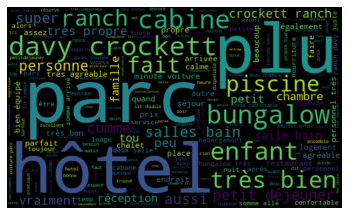

In [23]:
# Word cloud visualization.
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in hotel_reviews['commentaires']])
wordCloud = WordCloud(width=500, height=300, random_state=5000, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
#lancement de l'analyse des sentiments
def getAnalysis(score):
    if score < 0:
        return 'Négatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

hotel_reviews['sentiment'] = hotel_reviews['compound'].apply(getAnalysis)

hotel_reviews.tail(7)

,commentaires,compound,sentiment
7638,vient juste passer jours jours vacances eurodi...,0.7003,Positif
7639,famille moimême passé excellent séjour old ran...,0.1027,Positif
7640,lisez choses horribles français manque magie p...,-0.7269,Négatif
7641,meilleur lieux séjourner imagine dépend cherch...,0.0000,Neutre
7642,famille deux vacances davy crockett ranch comp...,0.0000,Neutre
7643,juste retour davy crockett ranch endroit affre...,-0.4767,Négatif
7644,minute trop eurodisney installation site plus ...,0.5574,Positif


In [26]:
hotel_reviews['sentiment'].value_counts()

Positif    3273
Neutre     3074
Négatif    1298
Name: sentiment, dtype: int64

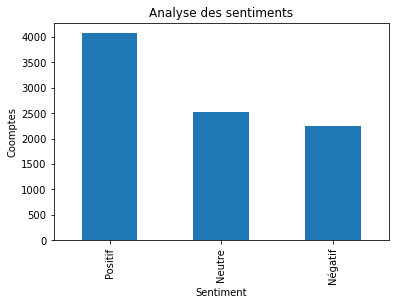

In [26]:
plt.title('Analyse des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Coomptes')
hotel_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Hotel Reviews Sentiment')

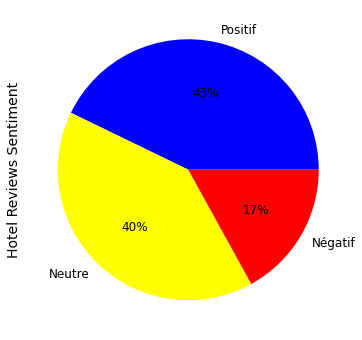

In [27]:
hotel_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "yellow","red"])
plt.ylabel("Hotel Reviews Sentiment", size=14)

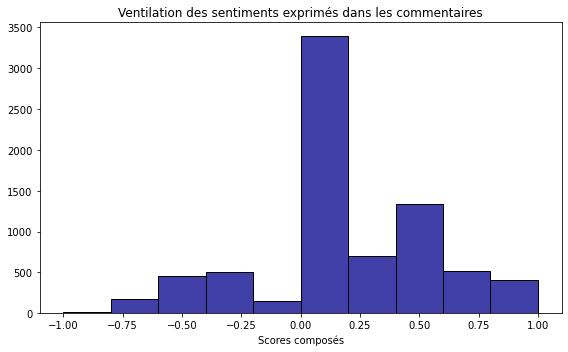

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(hotel_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Ventilation des sentiments exprimés dans les commentaires")
plt.xlabel("Scores composés")
plt.ylabel("")
plt.tight_layout()

# II. NLP Word2Vec avec Gensim

L'objectif est que les représentations vectorielles des mots soient proches lorsque ces mots correspondent à des contextes similaires 

In [29]:
import ast
liste=[ast.literal_eval(x) for x in reviews.commentaire]
from gensim.models import Word2Vec
modele = Word2Vec(liste,vector_size=2,window=5)
words= modele.wv
df =pd.DataFrame(words.vectors, columns=['V1','V2'], index=words.key_to_index.keys())

In [30]:
df.to_csv("words.vectors.txt",sep=";",header=True)

In [31]:
#(1) Mots-clés dégagés - Sélection des 50 premiers termes
dfMots= df[0:50]

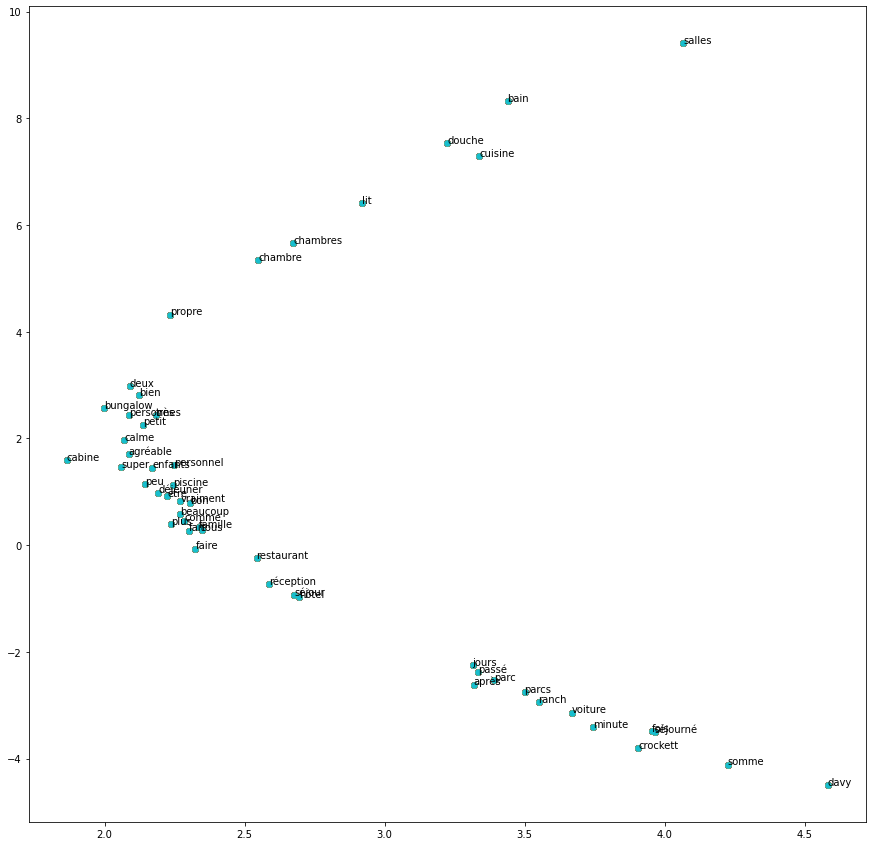

In [32]:
plt.figure(figsize=(15, 15))
for i in range(dfMots.shape[0]):
    plt.scatter(dfMots.V1,dfMots.V2,s=30)
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

In [33]:
#pour connaître les termes voisins d'un terme, par exemple d'un irritant :
words.most_similar("cher",topn=5)

[('rentre', 1.0),
 ('extrême', 1.0),
 ('dépassé', 1.0),
 ('offerte', 0.9999999403953552),
 ('finalement', 0.9999995827674866)]

In [34]:
#(2) Mots-clés dégagés - Sélection manuelle des thèmes dégagés (liste proche de celle de Marvel = généralisation possible)
mots = ['excellent','emplacement','personnel','dormir','impossible','boissons','personnel','inclus','conciergerie','réception','accueil','weekend','famille','piscine','bouilloire','prix','cher','loin','équipement','bébé','service','bon','bien','merveilleux','mauvaise','expérience','service','cher','baignoire','bouilloire','propre','propreté','manquait','poussière','cheveux','chambre','sommeil','buffet', 'déjeuner']
dfMots2= df.loc[mots, :]
dfMots2.head(10)

,V1,V2
excellent,2.342939,0.264111
emplacement,2.136472,1.287893
personnel,2.247050,1.500861
dormir,2.216880,1.634406
impossible,2.154039,0.447170
boissons,2.752473,-0.028720
personnel,2.247050,1.500861
inclus,2.664920,-0.974055
conciergerie,0.725381,0.005501
réception,2.587104,-0.736167


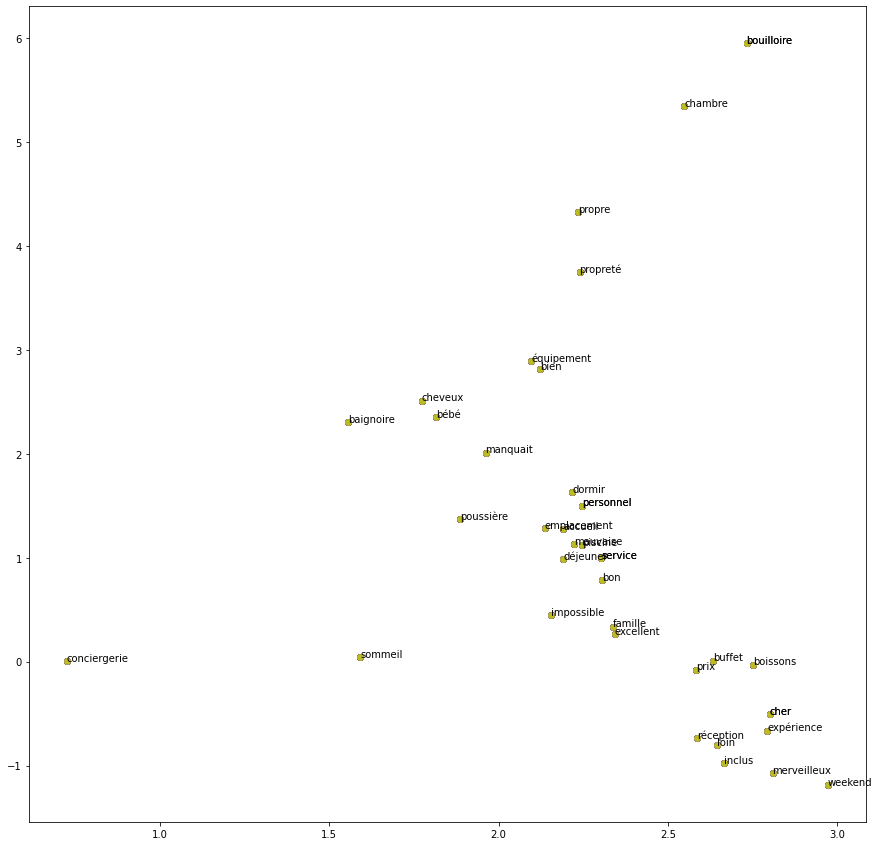

In [35]:
#graphique dans le plan

plt.figure(figsize=(15, 15))
for i in range(dfMots2.shape[0]):
    plt.scatter(dfMots2.V1,dfMots2.V2,s=30)
    plt.annotate(dfMots2.index[i],(dfMots2.V1[i],dfMots2.V2[i]))
plt.show()

In [36]:
words.most_similar('douche',topn=20)

[('récupérés', 0.9999998211860657),
 ('préférés', 0.9999995827674866),
 ('réversible', 0.9999991655349731),
 ('tiennent', 0.9999986290931702),
 ('fermaient', 0.9999979734420776),
 ('lavevaisselle', 0.9999975562095642),
 ('jolis', 0.9999938011169434),
 ('salles', 0.9999924898147583),
 ('bulle', 0.9999815821647644),
 ('ferment', 0.9999750852584839),
 ('manquaient', 0.9999565482139587),
 ('nid', 0.9999457597732544),
 ('sauna', 0.9999314546585083),
 ('bain', 0.9999231100082397),
 ('pin', 0.9999184012413025),
 ('ensoleillé', 0.9999079704284668),
 ('propres', 0.999902606010437),
 ('laissent', 0.999897301197052),
 ('visitent', 0.9998946189880371),
 ('approvisionner', 0.9998944997787476)]